In [1]:
%matplotlib notebook
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

In [25]:
from packtets.geometry import Cell
from packtets import *

def wrapper(foo):
    global res, box
    vx = [v1[x].value for x in range(3)]
    vy = [v2[x].value for x in range(3)]
    vz = [v3[x].value for x in range(3)]
    box = Cell(vx, vy, vz)
    res = pack_tets(box, input_packing=res, time_budget=time_budget.value, verbose=verbose, sample=sample.value)
    print("Packing number is {}".format(len(res)))
    return
    
def reset_packing(foo):
    global res
    res = []
    return

res = []
box = Cell([1.,0.,0.], [0.,1.,0.], [0., 0., 0.])

time_budget = widgets.BoundedFloatText(value=15, min=0.0, description='Budget (s):')
verbose = True
v1 = [widgets.BoundedFloatText(description="v1", min=0., value=1.),
      widgets.BoundedFloatText(min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=0.),
     ]
v1_opts = widgets.HBox(children=v1)
v2 = [widgets.BoundedFloatText(description="v2", min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=1.),
      widgets.BoundedFloatText(min=0., value=0.),
     ]
v2_opts = widgets.HBox(children=v2)
v3 = [widgets.BoundedFloatText(description="v3", min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=0.),
      widgets.BoundedFloatText(min=0., value=1.),
     ]
v3_opts = widgets.HBox(children=v3)

sample = widgets.Dropdown(
    description="Sampling method",
    options={"Uniform": uniform_sample}, 
    value=uniform_sample)

relax = widgets.Dropdown(
    description="Relaxing method",
    options={"None": no_relax}, 
    value=no_relax)

run = widgets.Button(description='Refine')
run.on_click(wrapper)

reset = widgets.Button(description='Reset packing')
reset.on_click(reset_packing)

display(v1_opts, v2_opts, v3_opts, sample, relax, time_budget, run, reset)

0.235702260396 2 11
0.235702260396 2 12
0.235702260396 2 13
0.235702260396 2 14
0.235702260396 2 15
0.235702260396 2 16
0.235702260396 2 17
0.235702260396 2 18
0.235702260396 2 19
0.235702260396 2 20
0.235702260396 2 21
0.235702260396 2 22
0.235702260396 2 23
0.235702260396 2 24
0.235702260396 2 25
0.235702260396 2 26
Packing number is 2


<IPython.core.display.Javascript object>


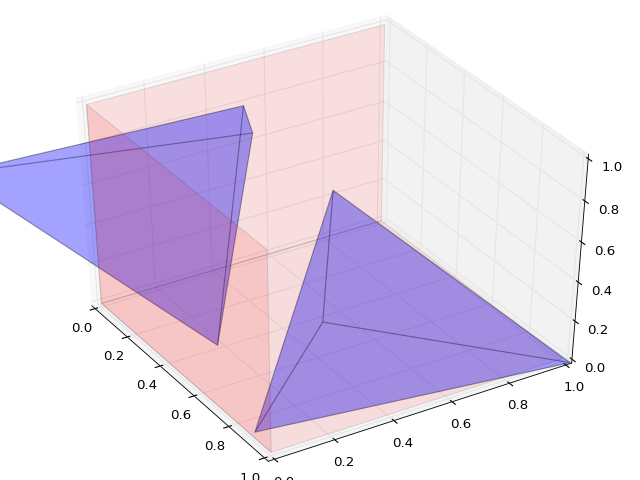

In [27]:
import scipy as sp
ax = a3.Axes3D(plt.figure(10))

bounding = [box.vx, box.vy, box.vz]
for i,j in [(0,1), (0,2), (1,2)]:
    verts = [(0,0,0)]
    verts.append(bounding[i])
    verts.append(bounding[i]+bounding[j])
    verts.append(bounding[j])
    face = a3.art3d.Poly3DCollection([verts], alpha=0.1)
    face.set_facecolor('red')
    face.set_edgecolor('k')

    ax.add_collection3d(face)


for tet in res:
    syms = tet.get_symmetry(box.vx, box.vy, box.vz)
    for s in syms[0:1]:
        for x,y,z in [(0,1,2), (0,1,3), (0,2,3), (1,2,3)]:
            verts = [tuple(s.verts[x]), tuple(s.verts[y]), tuple(s.verts[z])]
            tri = a3.art3d.Poly3DCollection([verts], alpha=0.2)
            tri.set_edgecolor('k')
            ax.add_collection3d(tri)

ax.set_xlim(0,max([v[0] for v in bounding]))
ax.set_ylim(0,max([v[1] for v in bounding]))
ax.set_zlim(0,max([v[2] for v in bounding]));